In [2]:
##############################
# Author: Jacob van de Lindt
# Date:   Oct 16, 2023
# MIT PSFC
##############################

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
from matplotlib import ticker, cm 
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import os, sys
import netCDF4

In [3]:
# Setting up the paths to the local directory
wkdir = os.getcwdb()

In [4]:
# Loading up the netcdf4 datasets
remoteDirectory = open(f'../../../../remoteDirectory.txt', 'r').readlines()[0].strip()
print('You are using remoteDirectory = ', remoteDirectory)
shotNum = remoteDirectory.split('/')[-1].split('_')[1]

You are using remoteDirectory =  ~/HFW_147634


In [5]:
# Get the case
cql_nc = netCDF4.Dataset(f'cql3d_rfpwr_0_7.nc','r')
cqlrf_nc = netCDF4.Dataset(f'cql3d_krf_rfpwr_0_7.nc','r')

In [6]:
rya = cql_nc.variables["rya"][:]

#pitch angles mesh at which f is defined in radians.
#Note that np.ma.getdata pulls data through mask which
# rejects bad data (NAN, etc)
pitchAngleMesh = np.ma.getdata(cql_nc.variables["y"][:])

#normalized speed mesh of f
normalizedVel = cql_nc.variables["x"][:]

enerkev = cql_nc.variables["enerkev"][:]

#flux surface average energy per particle in keV 
energy = cql_nc.variables["energy"][:]



['6e19', '6e19', '6e19', '5.986725056634288e19', '5.986725056634288e19', '5.986725056634288e19', '5.948518485302237e19', '5.948518485302237e19', '5.948518485302237e19', '5.887259120967139e19', '5.887259120967139e19', '5.887259120967139e19', '5.80455313706103e19', '5.80455313706103e19', '5.80455313706103e19', '5.702018824288829e19', '5.702018824288829e19', '5.702018824288829e19', '5.581357329271045e19', '5.581357329271045e19', '5.581357329271045e19', '5.444483787761028e19', '5.444483787761028e19', '5.444483787761028e19', '5.2945027091694944e19', '5.2945027091694944e19', '5.2945027091694944e19', '5.13546261090572e19', '5.13546261090572e19', '5.13546261090572e19', '4.972371000723766e19', '4.972371000723766e19', '4.972371000723766e19', '4.810849763151402e19', '4.810849763151402e19', '4.810849763151402e19', '4.6564296560072016e19', '4.6564296560072016e19', '4.6564296560072016e19', '4.514401272324039e19', '4.514401272324039e19', '4.514401272324039e19', '4.388320401667927e19', '4.388320401667

Text(0.5, 1.0, 'Genray Density Profile')

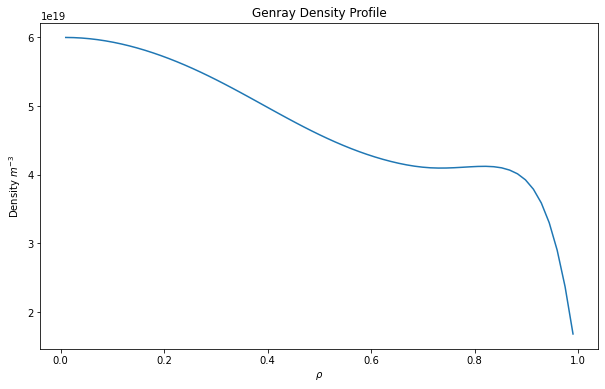

In [7]:
# Get the temperature and density profiles for the shot
denstring = '6d+19 6d+19 6d+19 5.986725056634288d+19 5.986725056634288d+19 5.986725056634288d+19 5.948518485302237d+19 5.948518485302237d+19 5.948518485302237d+19 5.887259120967139d+19 5.887259120967139d+19 5.887259120967139d+19 5.80455313706103d+19 5.80455313706103d+19 5.80455313706103d+19 5.702018824288829d+19 5.702018824288829d+19 5.702018824288829d+19 5.581357329271045d+19 5.581357329271045d+19 5.581357329271045d+19 5.444483787761028d+19 5.444483787761028d+19 5.444483787761028d+19 5.2945027091694944d+19 5.2945027091694944d+19 5.2945027091694944d+19 5.13546261090572d+19 5.13546261090572d+19 5.13546261090572d+19 4.972371000723766d+19 4.972371000723766d+19 4.972371000723766d+19 4.810849763151402d+19 4.810849763151402d+19 4.810849763151402d+19 4.6564296560072016d+19 4.6564296560072016d+19 4.6564296560072016d+19 4.514401272324039d+19 4.514401272324039d+19 4.514401272324039d+19 4.388320401667927d+19 4.388320401667927d+19 4.388320401667927d+19 4.281228931918998d+19 4.281228931918998d+19 4.281228931918998d+19 4.195155884299396d+19 4.195155884299396d+19 4.195155884299396d+19 4.133155055081277d+19 4.133155055081277d+19 4.133155055081277d+19 4.100435183688871d+19 4.100435183688871d+19 4.100435183688871d+19 4.100124665080464d+19 4.100124665080464d+19 4.100124665080464d+19 4.116454598261814d+19 4.116454598261814d+19 4.116454598261814d+19 4.118962810907007d+19 4.118962810907007d+19 4.118962810907007d+19 4.052988175976845d+19 4.052988175976845d+19 4.052988175976845d+19 3.808795850871087d+19 3.808795850871087d+19 3.808795850871087d+19 3.1393189052966003d+19 3.1393189052966003d+19 3.1393189052966003d+19 1.6795637554512267d+19 1.6795637554512267d+19 1.6795637554512267d+19'
tempstring = '4.44281 5.92375 5.92375 4.43003 5.90671 5.90671 4.39292 5.85723 5.85723 4.3328 5.77706 5.77706 4.25065 5.66753 5.66753 4.1474 5.52987 5.52987 4.024 5.36534 5.36534 3.8814 5.17521 5.17521 3.72173 4.96231 4.96231 3.54797 4.73063 4.73063 3.36412 4.48549 4.48549 3.1749 4.2332 4.2332 2.9853 3.98039 3.98039 2.79999 3.73332 3.73332 2.62237 3.49649 3.49649 2.45457 3.27276 3.27276 2.29738 3.06318 3.06318 2.15171 2.86895 2.86895 2.01948 2.69264 2.69264 1.90409 2.53879 2.53879 1.80979 2.41305 2.41305 1.72656 2.30208 2.30208 1.62506 2.16674 2.16674 1.44556 1.92741 1.92741 1.03492 1.37989 1.37989 0.10969 0.14625 0.14625'
denstring = denstring.replace('d+', 'e')
denstringlist = denstring.split()
tempstringlist = tempstring.split()
print(denstringlist)
dens = np.zeros((len(denstringlist), 1))
for i in range(len(denstringlist)): 
    dens[i] = float(denstringlist[i])

temps = np.zeros((len(tempstringlist), 1))
for i in range(len(tempstringlist)): 
    temps[i] = float(tempstringlist[i])

#print(temps.reshape(int(dens.shape[0]/3), 3))
dens = dens.reshape(int(dens.shape[0]/3), 3)[:, 0]
temps = temps.reshape(int(temps.shape[0]/3), 3)[:, 1]

rhotemps = np.linspace(0.01, .99, temps.shape[0])
rhodens = np.linspace(0.01, .99, dens.shape[0])

from scipy.interpolate import interp1d
get_dens_from_rho = interp1d(rhodens, dens, kind='cubic')
get_temps_from_rho = interp1d(rhotemps, temps, kind='cubic')
rho = np.ma.getdata(rya)

# Create an array over rho of the pre-cql density and temperature 
# profiles
genray_density = get_dens_from_rho(rho)
genray_temps = get_temps_from_rho(rho)

plt.figure(figsize=(10,6))
plt.plot(rho, genray_density)
plt.xlabel(r'$\rho$')
plt.ylabel(r'Density $m^{-3}$')
plt.title('Genray Density Profile')



Text(0.5, 1.0, 'Genray Temperature Profile')

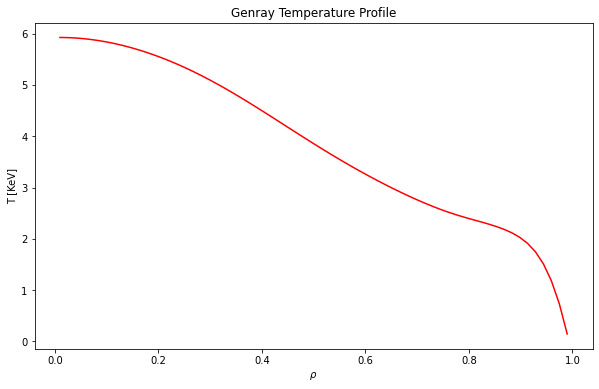

In [8]:
plt.figure(figsize=(10,6))
plt.xlabel(r'$\rho$')
plt.ylabel('T [KeV]')
plt.plot(rho, genray_temps, color='red')
plt.title('Genray Temperature Profile')


<ipython-input-9-d8fd0304ada8>:22: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pc = ax.pcolormesh(VPARA, VPERP, np.log(f_at_rho.T + 1))#np.log(f_at_rho.T+1))


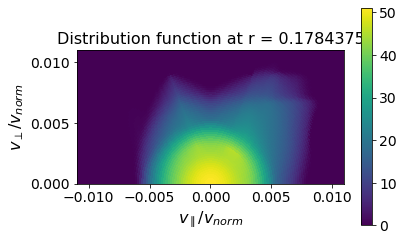

In [9]:
f = cql_nc.variables["f"][:]
ebkev = 80 # kev TODO: make sure this matches the file!! 
## Plot the distrobution function at a particular rho
rhoi = 0.1829 #0.25
i_rho = np.argmin(np.abs(rhoi - rya))

f_at_rho = f[0, i_rho, :, :]#f[0, i_rho, :, :]

pitchAngles = pitchAngleMesh[i_rho,:]
x = cql_nc.variables["x"][:]

V, Theta = np.meshgrid(x, pitchAngles)
VPARA = V*np.cos(Theta); VPERP = V*np.sin(Theta)

plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.rc('axes', labelsize = 16)
plt.rc('axes', titlesize = 16)
plt.rc('figure', titlesize = 18)
plt.rc('legend', fontsize = 14)
fig,ax = plt.subplots()
pc = ax.pcolormesh(VPARA, VPERP, np.log(f_at_rho.T + 1))#np.log(f_at_rho.T+1))
#ax.contourf(VPARA, VPERP, np.log(relevantF.T), cmap=cm.PuBu_r, levels = 100)
ax.set_aspect('equal')
ax.set_xlabel("$v_\parallel / v_{norm}$")
ax.set_ylabel("$v_\perp / v_{norm}$")
ax.set_ylim([0,0.011]); ax.set_xlim([-0.011,0.011])
ax.set_title(f'Distribution function at r = {rya[i_rho]}')
fig.colorbar(pc)
plt.show()

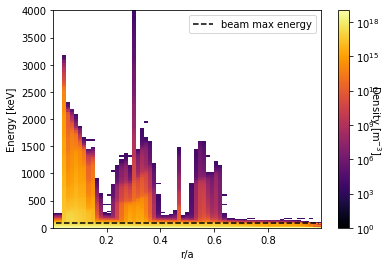

In [10]:
# Build the plot of energetic particles for a particular distrobution 

minEnergy = 2 # minimum energy for plotting

#index of that minimum energy in enerkev
#this index is also the index for the corresponding velocity
minEnergyIndex = np.where(enerkev < minEnergy)[0][-1]
#distribution function for energetic particles
energeticF = f[0, :,minEnergyIndex:,:]#f[0, :,minEnergyIndex:,:]

# begin integrating over velocity space 
energeticF_integOverPitch = np.zeros((len(rya), len(enerkev[minEnergyIndex:])))

# loop over r/a. At each r/a, integrate over all pitch angle. 
for rhoIndex in range(len(rya)):
    #this is the angular part of the spherical jacobian
    integOverPitch = 2*np.pi*np.trapz(energeticF[rhoIndex,:]*np.sin(pitchAngleMesh[rhoIndex]), pitchAngleMesh[rhoIndex], axis = 1)
    energeticF_integOverPitch[rhoIndex,:] = integOverPitch

relevantEnergies = enerkev[minEnergyIndex:]
relevantVels = normalizedVel[minEnergyIndex:]
energeticDensity = np.zeros((len(rya), len(relevantEnergies)-1))
#the energies at which the values of energeticDensity are centered
energyCenters = (relevantEnergies[1:] + relevantEnergies[:-1])/2
#We calculate energy centers by integrating up to the velocity mesh point on either side of the corresponding energyCenter point
#we then take the differences, which is the area in the bin between these two edges
for velIndex in range(len(relevantVels)-1):
    #this is the radial part of the spherical jacobian
    densityLower = np.ma.getdata(np.trapz(energeticF_integOverPitch[:,:velIndex]*relevantVels[:velIndex]**2,
        relevantVels[:velIndex]))
    densityUpper = np.ma.getdata(np.trapz(energeticF_integOverPitch[:,:velIndex+1]*relevantVels[:velIndex+1]**2,
        relevantVels[:velIndex+1]))

    if velIndex == 0:
        energeticDensity[:,velIndex] = densityUpper
        continue

    diff = densityUpper - densityLower

    energeticDensity[:,velIndex] = diff
    
energeticDensity = energeticDensity*1e6#convert to m^(-3)
energeticDensity = energeticDensity.astype('float64')
rya = rya.astype('float64')
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.rc('axes', labelsize = 10)
plt.rc('axes', titlesize = 10)
plt.rc('figure', titlesize = 10)
plt.rc('legend', fontsize = 10)

fig, ax = plt.subplots()

pcm = ax.pcolormesh(rya.T, energyCenters.T, energeticDensity.T, 
                norm=colors.LogNorm(vmin=1, vmax=np.max(energeticDensity.T)),
                shading = 'nearest', cmap='inferno')

cbar = fig.colorbar(pcm, ax=ax)
cbar.set_label(r'Density [m$^{-3}$]', rotation=270)
ax.set_ylim([0,4000])
plt.savefig('heatmap.png')
plt.plot(rya, (rya/rya)*ebkev, 'k--', label='beam max energy')
plt.xlabel('r/a')
plt.ylabel('Energy [keV]')
plt.legend()
plt.show()

Maxwellian total density:  5.218200620679142e+19
Maxwellian total density:  3.8725863579498604e+18
Maxwellian total density:  3.2364928736353423e+18


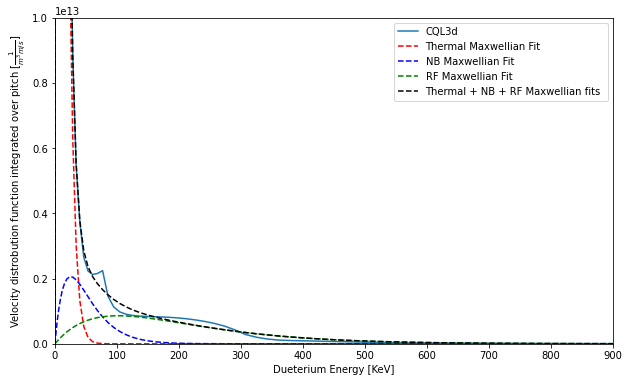

In [17]:
# Functions for fitting distrobution function 
def plot_maxwell_given_n_T_enerkev(n, T, enerkev, plotlog, color, label):
    # T in KeV, n in m^-3
    #plt.plot(np.ma.getdata(rya), get_dens_from_rho(np.ma.getdata(rya)))
    M = 3.343e-27
    v_array = np.sqrt(2*enerkev*1e3*1.6022e-19/M)


    T = T*1e3*1.6022e-19 # J
    f_maxwell_cold = n*(M/(2*np.pi*T))**(3/2) * np.exp(-M*v_array**2/(2*T))

    # plt.plot(0.5*M*v_array**2/(1.6022e-19*1000), 4*np.pi*v_array*f_maxwell_cold[0, :], 'r--')
    # plt.plot(v_array, 4*np.pi*v_array**2*f_maxwell_cold[rhoindex, :], 'r--')
    if plotlog:
        plt.plot(0.5*M*v_array**2/(1.6022e-19*1000), np.log(4*np.pi*v_array**2*f_maxwell_cold+1), '--', color=color, label=label)
    else: 
        plt.plot(0.5*M*v_array**2/(1.6022e-19*1000), 4*np.pi*v_array**2*f_maxwell_cold, '--', color=color, label=label)
    print('Maxwellian total density: ', np.trapz(4*np.pi*v_array**2*f_maxwell_cold, v_array))
    max_energy_grid = 0.5*M*v_array**2/(1.6022e-19*1000)
    return max_energy_grid, 4*np.pi*v_array**2*f_maxwell_cold

def maxwellian_fit(enerkev, n1, T1, n2, T2, n3, T3):
    M = 3.343e-27
    v_array = np.sqrt(2*enerkev*1e3*1.6022e-19/M)
    #print(max(v_array))
 


    T1 = T1*1e3*1.6022e-19 # J
    T2 = T2*1e3*1.6022e-19 # J
    T3 = T3*1e3*1.6022e-19 # J

    n1 = n1*1e19  # m^-3
    n2 = n2*1e19  # m^-3
    n3 = n3*1e19  # m^-3

    f_maxwell_1 = n1*(M/(2*np.pi*T1))**(3/2) * np.exp(-M*v_array**2/(2*T1))
    integrated_over_pitch_1 = 4*np.pi*v_array**2*f_maxwell_1

    f_maxwell_2 = n2*(M/(2*np.pi*T2))**(3/2) * np.exp(-M*v_array**2/(2*T2))
    integrated_over_pitch_2 = 4*np.pi*v_array**2*f_maxwell_2

    f_maxwell_3 = n3*(M/(2*np.pi*T3))**(3/2) * np.exp(-M*v_array**2/(2*T3))
    integrated_over_pitch_3 = 4*np.pi*v_array**2*f_maxwell_3

    return integrated_over_pitch_1 + integrated_over_pitch_2 + integrated_over_pitch_3
    
def fit_three_guassians_to_cql(enerkev, cql_nc, rhoindex, bounds):
    M = 3.343e-27
    vnorm = np.ma.getdata(cql_nc.variables['vnorm'])
    cint2 = cql_nc.variables['cint2']
    x_squared_dx = np.ma.getdata(cint2)
    cynt2 = cql_nc.variables['cynt2']
    normalizedVel = np.ma.getdata(cql_nc.variables['x'][:])
    two_pi_siny_dy = np.ma.getdata(cynt2)  # note that the pitch angle mesh depends on the radial location 

    ff = cql_nc.variables["f"][:][0]
    T = genray_temps[rhoindex]
    n = genray_density[rhoindex]/1e19
    integrated_over_pitch = np.trapz(ff[rhoindex, :]*two_pi_siny_dy[rhoindex], axis=1)
    integrated_over_pitch = 1e6*integrated_over_pitch*normalizedVel**2*(1/vnorm)*100  # SI units
    
    # popt = curve_fit(maxwellian_fit, enerkev, integrated_over_pitch, p0=[n, T, .1*n, 30, .1*n, 0.9*bounds[-1][-1] ], bounds=bounds)
    popt = curve_fit(maxwellian_fit, enerkev, integrated_over_pitch, p0=[n, T, .1*n, 4*T, .1*n, 0.9*bounds[-1][-1] ], bounds=bounds)
    #popt = curve_fit(maxwellian_fit, enerkev, integrated_over_pitch, p0=[1, 8, .4, 30, .1, 200 ])
    #print(len(popt[0]))
    n1 = popt[0][0]
    T1 = popt[0][1]
    n2 = popt[0][2]
    T2 = popt[0][3]
    n3 = popt[0][4]
    T3 = popt[0][5]

    return integrated_over_pitch, n1, T1, n2, T2, n3, T3

#--------------------------------------------------
# Call the curve fitting function 
rhoindex = 4
T = genray_temps[rhoindex]
n = genray_density[rhoindex]/1e19
bounds = ([0, 0, 0, 2*T, 0, 80],[n*1.2, T*1.2, 0.15*n, 80, 0.15*n, 500])
integrated_over_pitch, n1, T1, n2, T2, n3, T3 = fit_three_guassians_to_cql(enerkev, cql_nc=cql_nc, rhoindex=rhoindex, bounds=bounds)

array_to_sort = np.array([[T1, T2, T3], [n1, n2, n3]])
sorted_array = array_to_sort[:, array_to_sort[0].argsort()]


T_th = sorted_array[0, 0]
T_NB = sorted_array[0, 1]
T_RF = sorted_array[0, 2]

n_th = sorted_array[1, 0]
n_NB = sorted_array[1, 1]
n_RF = sorted_array[1, 2]

# ----------------------------------------------------

plt.figure(figsize=(10,6))
plt.plot(enerkev, integrated_over_pitch, label='CQL3d')

max_energy_gridTH, max_TH = plot_maxwell_given_n_T_enerkev(n_th*1e19, T_th, enerkev, plotlog=False, color='red', label='Thermal Maxwellian Fit')
max_energy_gridNB, max_NB = plot_maxwell_given_n_T_enerkev(n_NB*1e19, T_NB, enerkev, plotlog=False, color='blue', label='NB Maxwellian Fit')
max_energy_gridRF, max_RF = plot_maxwell_given_n_T_enerkev(n_RF*1e19, T_RF, enerkev, plotlog=False, color='green', label='RF Maxwellian Fit')

# get_max_fvsqTH = interp1d(max_energy_gridTH, max_TH, kind='cubic')
# m_TH = get_max_fvsqTH(np.ma.getdata(enerkev))

# get_max_fvsqNB = interp1d(max_energy_gridNB, max_NB, kind='cubic')
# m_NB = get_max_fvsqNB(np.ma.getdata(enerkev))

# get_max_fvsqRF = interp1d(max_energy_gridRF, max_RF, kind='cubic')
# m_RF = get_max_fvsqRF(np.ma.getdata(enerkev))


plt.plot(enerkev,  max_TH + max_NB + max_RF, '--', label='Thermal + NB + RF Maxwellian fits ', color='black')
plt.xlabel('Dueterium Energy [KeV]')
plt.ylabel(r'Velocity distrobution function integrated over pitch [$\frac{1}{m^3 m/s}$]')
plt.xlim(0, 900)
plt.ylim(0, (1e13))
plt.legend()

In [12]:
# Create arrays to hold the thermal, neutral beam, and maxwellian profiles over rho
print(rho)
nth_array = np.zeros_like(rho)
nNB_array = np.zeros_like(rho)
nRF_array = np.zeros_like(rho)

Tth_array = np.zeros_like(rho)
TNB_array = np.zeros_like(rho)
TRF_array = np.zeros_like(rho)



[0.01      0.0253125 0.040625  0.0559375 0.07125   0.0865625 0.101875
 0.1171875 0.1325    0.1478125 0.163125  0.1784375 0.19375   0.2090625
 0.224375  0.2396875 0.255     0.2703125 0.285625  0.3009375 0.31625
 0.3315625 0.346875  0.3621875 0.3775    0.3928125 0.408125  0.4234375
 0.43875   0.4540625 0.469375  0.4846875 0.5       0.5153125 0.530625
 0.5459375 0.56125   0.5765625 0.591875  0.6071875 0.6225    0.6378125
 0.653125  0.6684375 0.68375   0.6990625 0.714375  0.7296875 0.745
 0.7603125 0.775625  0.7909375 0.80625   0.8215625 0.836875  0.8521875
 0.8675    0.8828125 0.898125  0.9134375 0.92875   0.9440625 0.959375
 0.9746875 0.99     ]


Maxwellian total density:  1.0177240845070643e+19
Maxwellian total density:  2.519345553555301e+18
Maxwellian total density:  5.2290739551189344e+17


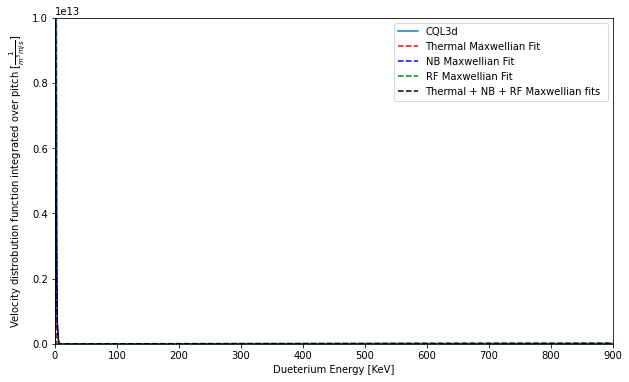

In [13]:
#--------------------------------------------------
# Call the curve fitting function 
rhoindex = 64

for rhoindex in range(rho.shape[0]):
    T = genray_temps[rhoindex]
    n = genray_density[rhoindex]/1e19
    # bounds = ([0, 0, 0, 2*T, 0, 80],[n*1.2, T*1.2, 0.15*n, 80, 0.15*n, 500])
    bounds = ([0, 0, 0, 2*T, 0, 80],[n*1.2, T*1.2, 0.15*n, 80, 0.15*n, 3000])
    integrated_over_pitch, n1, T1, n2, T2, n3, T3 = fit_three_guassians_to_cql(enerkev, cql_nc=cql_nc, rhoindex=rhoindex, bounds=bounds)

    array_to_sort = np.array([[T1, T2, T3], [n1, n2, n3]])
    sorted_array = array_to_sort[:, array_to_sort[0].argsort()]

    # Load up this rho index's density and temperature values
    T_th = sorted_array[0, 0]
    T_NB = sorted_array[0, 1]
    T_RF = sorted_array[0, 2]

    n_th = sorted_array[1, 0]
    n_NB = sorted_array[1, 1]
    n_RF = sorted_array[1, 2]

    nth_array[rhoindex] = n_th
    nNB_array[rhoindex] = n_NB
    nRF_array[rhoindex] = n_RF

    Tth_array[rhoindex] = T_th
    TNB_array[rhoindex] = T_NB
    TRF_array[rhoindex] = T_RF

# ----------------------------------------------------

plt.figure(figsize=(10,6))
plt.plot(enerkev, integrated_over_pitch, label='CQL3d')

max_energy_gridTH, max_TH = plot_maxwell_given_n_T_enerkev(n_th*1e19, T_th, enerkev, plotlog=False, color='red', label='Thermal Maxwellian Fit')
max_energy_gridNB, max_NB = plot_maxwell_given_n_T_enerkev(n_NB*1e19, T_NB, enerkev, plotlog=False, color='blue', label='NB Maxwellian Fit')
max_energy_gridRF, max_RF = plot_maxwell_given_n_T_enerkev(n_RF*1e19, T_RF, enerkev, plotlog=False, color='green', label='RF Maxwellian Fit')


plt.plot(enerkev,  max_TH + max_NB + max_RF, '--', label='Thermal + NB + RF Maxwellian fits ', color='black')
plt.xlabel('Dueterium Energy [KeV]')
plt.ylabel(r'Velocity distrobution function integrated over pitch [$\frac{1}{m^3 m/s}$]')
plt.xlim(0, 900)
plt.ylim(0, (1e13))
plt.legend()

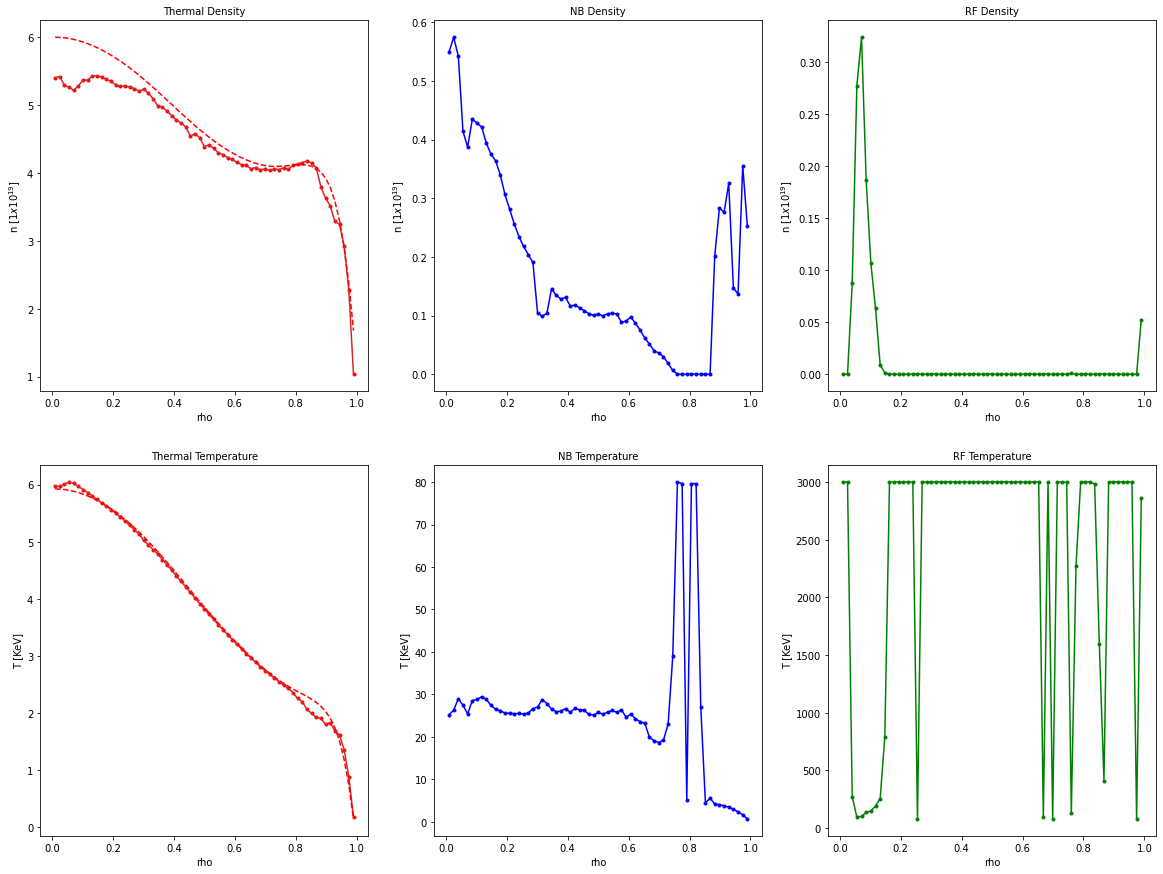

In [14]:
# plot the thermal, neutral beam, and RF density and temperature 
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
axs[0, 0].plot(rho, nth_array, 'tab:red')
axs[0, 0].scatter(rho, nth_array, color='red', marker='.')
axs[0, 0].plot(rho, genray_density/1e19, color='red', linestyle='--')
axs[0, 0].set_title('Thermal Density')
axs[0, 0].set_xlabel('rho')
axs[0, 0].set_ylabel(r'n $[1x10^{19}]$')

axs[1, 0].plot(rho, Tth_array, 'tab:red')
axs[1, 0].scatter(rho, Tth_array, color='red', marker='.')
axs[1, 0].plot(rho, genray_temps, color='red', linestyle='--')
axs[1, 0].set_title('Thermal Temperature')
axs[1, 0].set_xlabel('rho')
axs[1, 0].set_ylabel('T [KeV]')

axs[0, 1].plot(rho, nNB_array, color='blue')
axs[0, 1].scatter(rho, nNB_array, color='blue', marker='.')
axs[0, 1].set_title('NB Density')
axs[0, 1].set_xlabel('rho')
axs[0, 1].set_ylabel(r'n $[1x10^{19}]$')

axs[1, 1].plot(rho, TNB_array, color='blue')
axs[1, 1].scatter(rho, TNB_array, color='blue', marker='.')
axs[1, 1].set_title('NB Temperature')
axs[1, 1].set_xlabel('rho')
axs[1, 1].set_ylabel('T [KeV]')

axs[0, 2].plot(rho, nRF_array, color='green')
axs[0, 2].scatter(rho, nRF_array, color='green', marker='.')
axs[0, 2].set_title('RF Density')
axs[0, 2].set_xlabel('rho')
axs[0, 2].set_ylabel(r'n $[1x10^{19}]$')

axs[1, 2].plot(rho, TRF_array, color='green')
axs[1, 2].scatter(rho, TRF_array, color='green', marker='.')
axs[1, 2].set_title('RF Temperature')
axs[1, 2].set_xlabel('rho')
axs[1, 2].set_ylabel('T [KeV]')
plt.show()
# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

n_th:  5.269314775583236
T_th:  5.426269134004593 

n_NB:  0.2599616740432554
T_NB:  24.55214237039264 

n_RF:  1.7426013226448813e-13
T_RF:  199.99999999999997 

Maxwellian total density:  5.269314609096316e+19
Maxwellian total density:  2.599616658306646e+18
Maxwellian total density:  1742601.2676551503


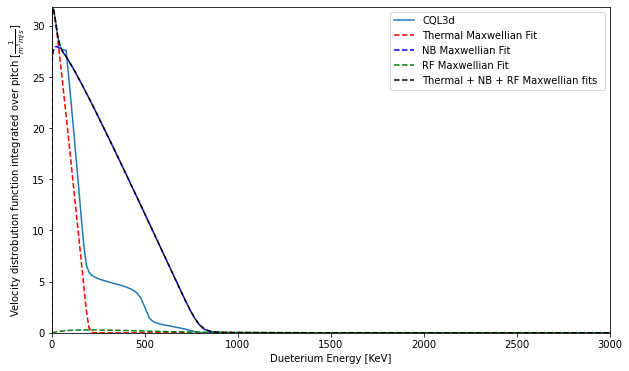

In [22]:
rhoindex = 14
T = genray_temps[rhoindex]
n = genray_density[rhoindex]/1e19
bounds = ([0, 0, 0, 3*T, 0, 80],[n*1.2, T*1.2, 0.15*n, 4.5*T, 0.15*n, 200])
integrated_over_pitch, n1, T1, n2, T2, n3, T3 = fit_three_guassians_to_cql(enerkev, cql_nc=cql_nc, rhoindex=rhoindex, bounds=bounds)

array_to_sort = np.array([[T1, T2, T3], [n1, n2, n3]])
sorted_array = array_to_sort[:, array_to_sort[0].argsort()]

# Load up this rho index's density and temperature values
T_th = sorted_array[0, 0]
T_NB = sorted_array[0, 1]
T_RF = sorted_array[0, 2]

n_th = sorted_array[1, 0]
n_NB = sorted_array[1, 1]
n_RF = sorted_array[1, 2]

# nth_array[rhoindex] = n_th
# nNB_array[rhoindex] = n_NB
# nRF_array[rhoindex] = n_RF

# Tth_array[rhoindex] = T_th
# TNB_array[rhoindex] = T_NB
# TRF_array[rhoindex] = T_RF
print('n_th: ', n_th)
print('T_th: ', T_th, '\n')
print('n_NB: ', n_NB)
print('T_NB: ', T_NB, '\n')
print('n_RF: ', n_RF)
print('T_RF: ', T_RF, '\n')
# ----------------------------------------------------
plotlog = True
max_yrange = 7e13# 0.7e13 # 7e13
max_xrange = 3000
plt.figure(figsize=(10,6))
if plotlog:
    plt.plot(enerkev, np.log(1+integrated_over_pitch), label='CQL3d')
else:
    plt.plot(enerkev, (integrated_over_pitch), label='CQL3d')

max_energy_gridTH, max_TH = plot_maxwell_given_n_T_enerkev(n_th*1e19, T_th, enerkev, plotlog=plotlog, color='red', label='Thermal Maxwellian Fit')
max_energy_gridNB, max_NB = plot_maxwell_given_n_T_enerkev(n_NB*1e19, T_NB, enerkev, plotlog=plotlog, color='blue', label='NB Maxwellian Fit')
max_energy_gridRF, max_RF = plot_maxwell_given_n_T_enerkev(n_RF*1e19, T_RF, enerkev, plotlog=plotlog, color='green', label='RF Maxwellian Fit')

if plotlog:
    plt.plot(enerkev,  np.log(1+max_TH + max_NB + max_RF), '--', label='Thermal + NB + RF Maxwellian fits ', color='black')
else:
    plt.plot(enerkev,  max_TH + max_NB + max_RF, '--', label='Thermal + NB + RF Maxwellian fits ', color='black')

plt.xlabel('Dueterium Energy [KeV]')
plt.ylabel(r'Velocity distrobution function integrated over pitch [$\frac{1}{m^3 m/s}$]')
plt.xlim(0, max_xrange)
if plotlog:
    plt.ylim(0, np.log(max_yrange))
else:
    plt.ylim(0, (max_yrange))

plt.legend()

(500,)
(65, 240)
(65, 500, 240)
The desnity at rho =  64  is  5.928619235902101  m^-3
(500,)
5.928619235902101e+19
Maxwellian total density:  5.968176403292591e+19
Fast particle Density:  5.928619235902101e+19
5.9286192359021e+19
3461466.8735294905
Maxwellian total density:  4.4999998578475325e+18
Maxwellian total density:  2.4999999210693304e+18


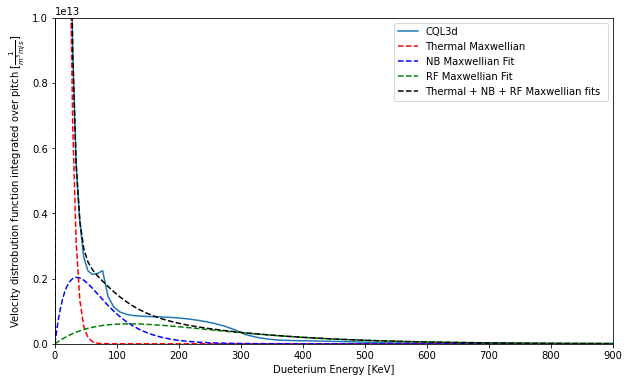

In [17]:
#------------------------------
# Not really used
#------------------------------



# new area to test out Yuri's fix.
M = 3.343e-27
vnorm = np.ma.getdata(cql_nc.variables['vnorm'])
cint2 = cql_nc.variables['cint2']
x_squared_dx = np.ma.getdata(cint2)
cynt2 = cql_nc.variables['cynt2']
normalizedVel = np.ma.getdata(cql_nc.variables['x'][:])
two_pi_siny_dy = np.ma.getdata(cynt2)  # note that the pitch angle mesh depends on the radial location 

print(x_squared_dx.shape)
print(two_pi_siny_dy.shape) 

rhoindex = 4

ff = f[0]
print(ff.shape)

integrated_over_pitch = np.trapz(ff[rhoindex, :]*two_pi_siny_dy[rhoindex], axis=1)
density = np.trapz(integrated_over_pitch*x_squared_dx)
print(r'The desnity at rho = ', rhoIndex, ' is ', 1e6*density/1e19, r' m^-3')
#---------------
density_at_energy = np.zeros(normalizedVel.shape[0])
energyCenters = (enerkev[1:] + enerkev[:-1])/2
for velIndex in range(len(normalizedVel)-1):
    #this is the radial part of the spherical jacobian
    densityLower = np.ma.getdata(np.trapz(integrated_over_pitch[:velIndex]*x_squared_dx[:velIndex]))
    densityUpper = np.ma.getdata(np.trapz(integrated_over_pitch[:velIndex+1]*x_squared_dx[:velIndex+1]))

    if velIndex == 0:
        density_at_energy[velIndex] = densityUpper
        continue

    diff = densityUpper - densityLower

    density_at_energy[velIndex] = diff

#---------------
velocity_array = normalizedVel*vnorm/100 # this is in SI
vslice = 120
print(integrated_over_pitch.shape)
print(density*1e6)
#plt.plot(normalizedVel[:100]*vnorm/100, 1e6*density_at_energy[:100]/fac)
plt.figure(figsize=(10,6))
#plt.plot(velocity_array[:vslice], 1e6*integrated_over_pitch[:vslice]*normalizedVel[:vslice]**2*(1/vnorm)*100)
plt.plot(enerkev[:vslice], (1e6*integrated_over_pitch[:vslice]*normalizedVel[:vslice]**2*(1/vnorm)*100+1), label='CQL3d')

# Get thee 
n_rho = genray_density[rhoindex]
T_rho = genray_temps[rhoindex]
max_energy_grid, max_fvsquared = plot_maxwell_given_n_T_enerkev(n_rho, T_rho, enerkev, plotlog=False, color='red', label='Thermal Maxwellian')
get_max_fvsq = interp1d(max_energy_grid, max_fvsquared, kind='cubic')
max_fvsqNB = get_max_fvsq(np.ma.getdata(enerkev[:vslice]))

plt.xlabel('Dueterium Velocity [m/s]')
plt.xlabel('Dueterium Energy [KeV]')
plt.ylabel(r'Velocity distrobution function integrated over pitch [$\frac{1}{m^3 m/s}$]')

print('Fast particle Density: ', 1e6*np.trapz(density_at_energy))#*fac, normalizedVel*vnorm/100))
print(np.sum(density_at_energy*1e6))
print(np.sqrt(2*125000*1.6022e-19/M))


max_energy_gridNB, max_fvsquaredNB = plot_maxwell_given_n_T_enerkev(4.5e18, 35, enerkev, plotlog=False, color='blue', label='NB Maxwellian Fit')
max_energy_gridRF, max_fvsquaredRF = plot_maxwell_given_n_T_enerkev(2.5e18, 120, enerkev, plotlog=False, color='green', label='RF Maxwellian Fit')

get_max_fvsq = interp1d(max_energy_grid, max_fvsquared, kind='cubic')
max_fvsq = get_max_fvsq(np.ma.getdata(enerkev[:vslice]))

get_max_fvsqNB = interp1d(max_energy_gridNB, max_fvsquaredNB, kind='cubic')
max_fvsqNB = get_max_fvsqNB(np.ma.getdata(enerkev[:vslice]))

get_max_fvsqRF = interp1d(max_energy_gridRF, max_fvsquaredRF, kind='cubic')
max_fvsqRF = get_max_fvsqRF(np.ma.getdata(enerkev[:vslice]))

plt.plot(enerkev[:vslice], max_fvsqRF + max_fvsqNB + max_fvsq, '--', label='Thermal + NB + RF Maxwellian fits ', color='black')
plt.plot()
plt.xlim(0, 900)
plt.ylim(0, (1e13))
plt.legend()